In [6]:
# For debug
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from GenPosition import *

In [7]:
# Read factor exposure and historical factor returns
fr = pd.read_csv('./temp/factor_return_20150102.csv')
fx = pd.read_csv('./temp/factor_exposure_20150102.csv')

In [8]:
stock_list, w_opt = GenPosition(fr, fx, U=0.2)

In [9]:
w_opt = PositionFilter(w_opt)

In [10]:
ptfl = pd.DataFrame({"ticker": stock_list, "weight": list(w_opt.T[0])})
ptfl_ = ptfl[ptfl['weight'] != 0]
print(ptfl_)

    ticker  weight
342    MCD     0.2
350     MO     0.2
370    NKE     0.2
414     PM     0.2
537    USB     0.2


In [11]:
tk = ptfl_['ticker']
ret, sigma, stock_list = stock_ret_est.GenReturn(fr, fx)

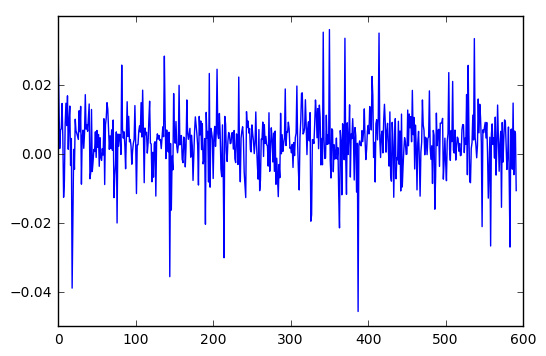

In [12]:
plt.plot(ret)
plt.show()

In [13]:
fx.ix[tk.index]

,date,ticker,market_cap,beta,momentum,vol10
342,1/2/2015,MCD,3.000000,-0.119815,-0.091678,-0.539200
350,1/2/2015,MO,3.000000,-0.082875,0.542545,-0.509851
370,1/2/2015,NKE,2.832736,-0.083678,0.964111,-0.385240
414,1/2/2015,PM,3.000000,-0.080901,0.121280,-0.491177
537,1/2/2015,USB,2.770186,-0.030075,0.098533,-0.533413


In [14]:
fr_m = fr.mean()
fr_m

market_cap    0.009390
beta          0.000457
momentum      0.001821
vol10        -0.013866
dtype: float64

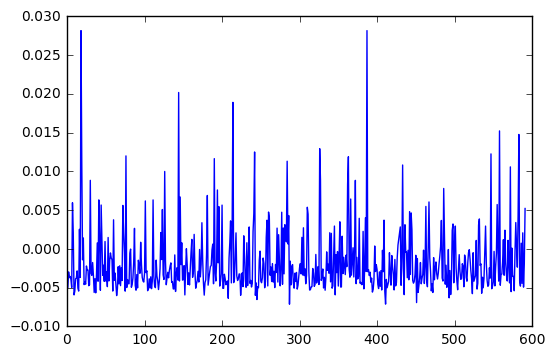

In [15]:
plt.plot(fx['vol10'] * fr_m[0])
plt.show()

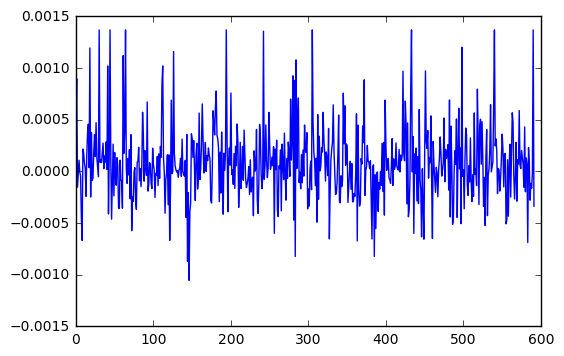

In [16]:
plt.plot(fx['momentum'] * fr_m[1])
plt.show()

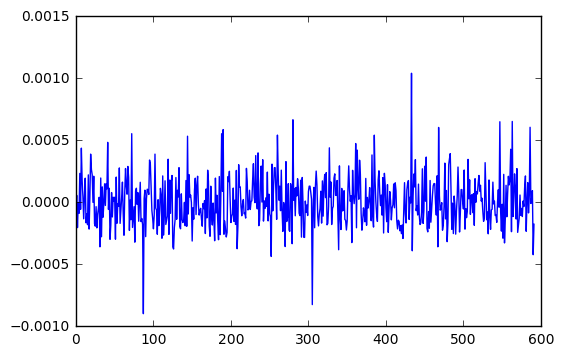

In [17]:
plt.plot(fx['beta'] * fr_m[2])
plt.show()

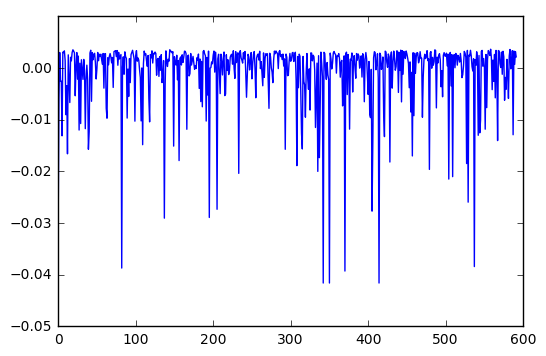

In [18]:
plt.plot(fx['market_cap'] * fr_m[3])
plt.show()